In [46]:
import xarray_behave as xb
import numpy as np
import matplotlib.pyplot as plt
import xarray_behave.metrics as mt


datenames = ['localhost-20190703_101857',
               'localhost-20190703_104113',
               'localhost-20190703_105557',
               'localhost-20190703_110854',
               'localhost-20190703_112309',
               'localhost-20190703_135932',
               'localhost-20181217_092542',
               'localhost-20181212_102357',
               'localhost-20181129_171011',
               'localhost-20181129_152532',
               'localhost-20181122_153211',
               'localhost-20181122_163213',
               'localhost-20181121_162138',
               'localhost-20181120_144618',
               'localhost-20181120_150816',
               'localhost-20181120_153406',
               'localhost-20181120_160026',
               'localhost-20181120_161230',
               'localhost-20181015_101001']
datename = 'localhost-20190703_110854'
root = '/Volumes/ukme04/#Common/chainingmic'

In [47]:
ds = xb.assemble(datename, root, include_song=False)
dsm = xb.assemble_metrics(ds)   

In [48]:
ds.pose_positions.sel(poseparts='head')
d = mt.distance(ds.pose_positions.sel(poseparts='head').values, ds.pose_positions.sel(poseparts='tail').values)

dd = np.diagonal(d, axis1=1, axis2=2)  # keep only cross-distances
dd = mt.smooth(dd, 512)

spd = dsm.abs_features.sel(absolute_features='velocity_magnitude')


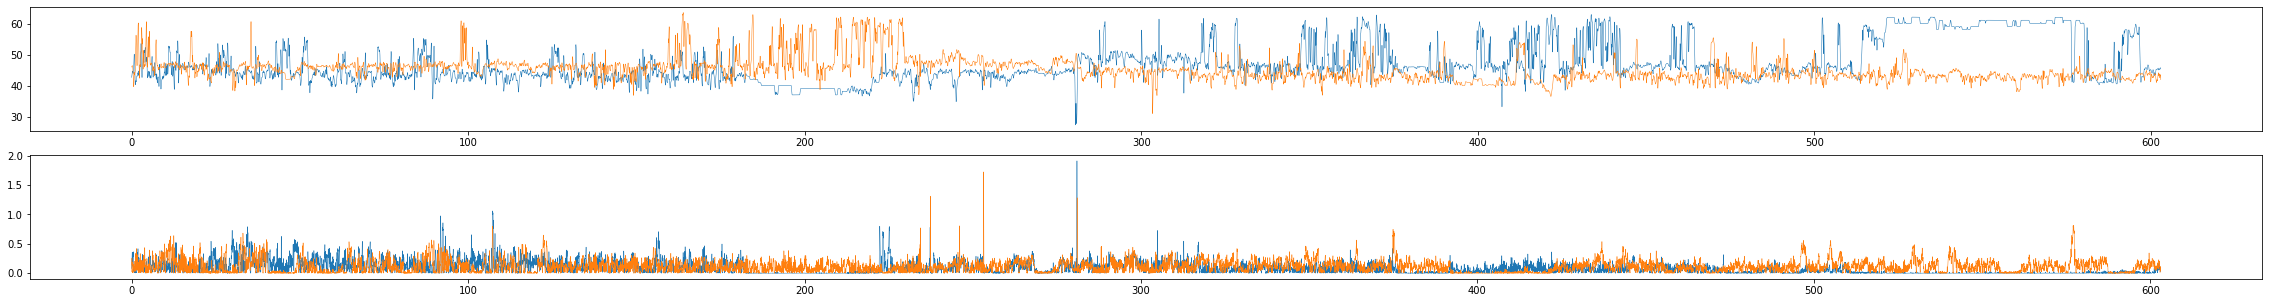

In [62]:
plt.gcf().set_size_inches(40, 5)
plt.subplot(211)
plt.plot(ds.time, dd, linewidth=0.5)
plt.subplot(212)
plt.plot(ds.time, spd, linewidth=0.5)

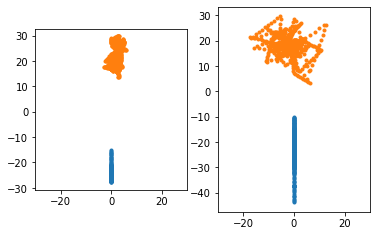

In [60]:
head, tail = ds.pose_positions.sel(poseparts='head').values, ds.pose_positions.sel(poseparts='tail').values
for fly in range(2):
    plt.subplot(1,2, fly+1)
    plt.plot(head[:1000,fly,1], head[:1000,fly,0], '.')
    plt.plot(tail[:1000,fly,1], tail[:1000,fly,0], '.')
    plt.axis('square')
    plt.xlim(-30, 30)



In [67]:
ds.pose_positions_allo.values = ds.pose_positions_allo.values[:, ::-1, ...]